In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [4]:
img_pil = Image.open("./images/mon.jpg").convert("L")
img_cv2 = cv2.imread("./images/mon.jpg")
gray_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

In [5]:
def plot_image(image_1, image_2, title_1, title_2):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap='gray')
    plt.title(title_1)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap='gray')
    plt.title(title_2)
    plt.axis("off")

    plt.show()


(np.float64(-0.5), np.float64(181.5), np.float64(275.5), np.float64(-0.5))

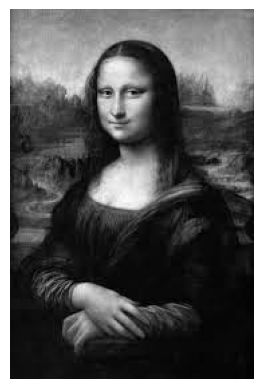

In [6]:
img_pil_np = np.array(img_pil)
plt.imshow(img_pil, cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(181.5), np.float64(275.5), np.float64(-0.5))

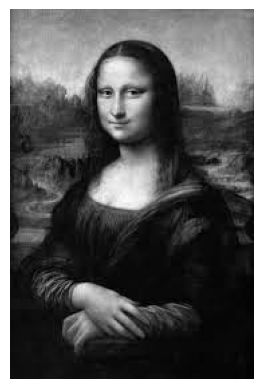

In [7]:
plt.imshow(img_pil, cmap='gray')
plt.axis("off")

### What does the array representation of the image look like?

If the image array has shape (500, 500), it’s a grayscale image with 500 pixels in height and width, and each value from 0 to 255 represents the brightness of a pixel — where 0 is black and 255 is white.

### What is the shape, data type, and pixel range?

**Shape:** is the height and width of the image (Pixels).<br>
**Data Type:** is unsigned 8-bit integer. <br>
**Pixel Range:** is the range of the pixel which is from 0 (Black) to 255 (white)

### Add a fixed value (e.g., +50) to all pixel values of the grayscale image?

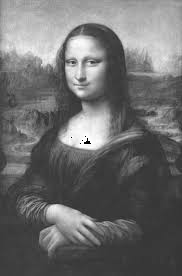

In [8]:
# We cant add directly to the image we should add the values after converting the image into the array then we can do the addition
more_brighter = img_pil_np + 50

# Then we have to convert it back to the image
brighter_img = Image.fromarray(more_brighter)
brighter_img

### How does the image change?

What happened is we increased the brightness of each pixel and the image comes more brighter.

### What happens if a pixel value exceeds 255?

If a pixel value exceeds 255, it gets clipped to 255 — the maximum brightness.

### Now try adding a much higher value (e.g., +300) to the image and see what happens

In [9]:
more_more_brighter = np.clip(img_pil_np + 300, 0, 255).astype(np.uint8)

OverflowError: Python integer 300 out of bounds for uint8

Adding 300 is not allowed because 300 is outside the range and cant get the get the expected result

### Try using np.clip() to keep values between 0 and 255.

In [ ]:
more_more_brighter = img_pil_np.astype(np.int32) + 300
more_more_brighter = np.clip(more_more_brighter, 0, 255).astype(np.uint8)
more_more_brighter

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(276, 182), dtype=uint8)

### Subtract a fixed value (e.g., -100) from the image?

In [ ]:
dark_img = img_pil_np - 100
dark_img

array([[237, 245, 253, ..., 244, 244, 243],
       [238, 245, 254, ..., 251, 250, 249],
       [238, 246, 255, ...,   4,   2,   1],
       ...,
       [168, 168, 168, ..., 160, 160, 160],
       [168, 168, 168, ..., 160, 160, 160],
       [168, 168, 168, ..., 160, 160, 160]], shape=(276, 182), dtype=uint8)

(np.float64(-0.5), np.float64(181.5), np.float64(275.5), np.float64(-0.5))

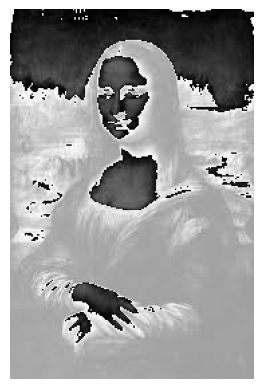

In [ ]:
plt.imshow(dark_img, cmap='gray')
plt.axis("off")

### What happens to the dark regions?

Grayscale pixels range from 0 (black) to 255 (white). When you subtract 100, brightness drops — and if a pixel is already low (like 30), it can go negative, which uint8 can't store. So dark areas become fully black.

### Are any values going below 0?

Pixel values will not go below 0 in instead, they will increase to a high number unless you change the data type.

### Use Clip(0, 255) to fix underflow and observe the difference?

this will fix the pixels vales to not go under the 0 (black) and 255 (white) so it keeps them in this range

### Transpose the image array using .T or np.transpose().

In [ ]:
transposed_img = img_pil_np.T

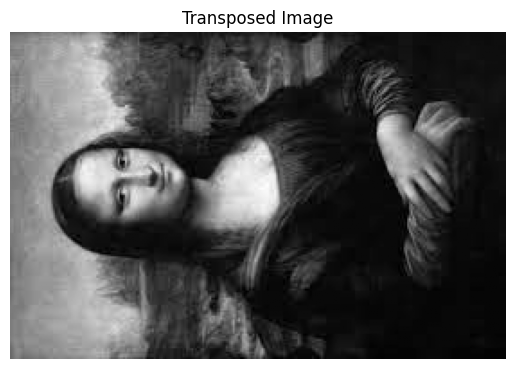

In [ ]:
plt.imshow(transposed_img, cmap='gray')
plt.title("Transposed Image")
plt.axis("off")
plt.show()

### What happens to the orientation of the image?

What happend is we switch between the columns and rows (height, width)

### Does this feel like a flip, a rotation, or something else?

its looks like it flipped but what happened is we rotate the image diagonally from top-left to bottom-rihgt

### Use np.fliplr() (left–right) and np.flipud() (up–down).

np.fliplr() (left–right)

In [ ]:
left_right_flip = np.fliplr(img_pil_np)

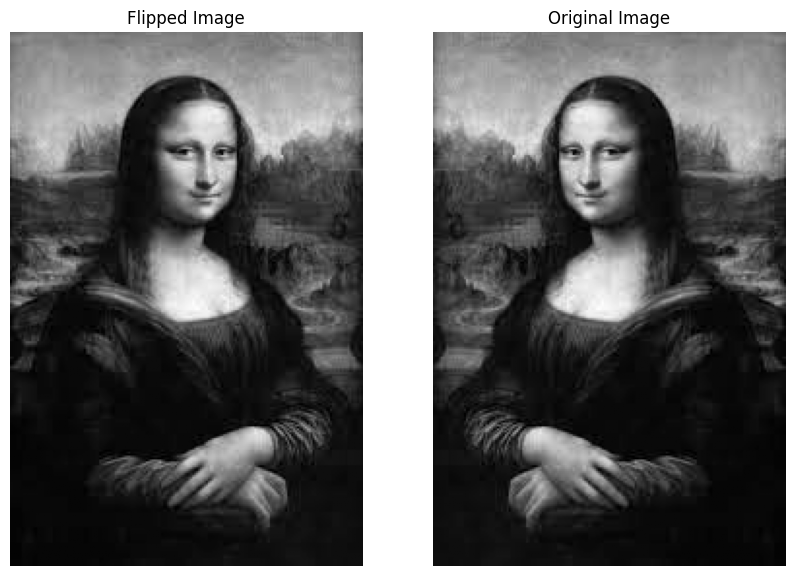

In [ ]:
plot_image(left_right_flip, img_pil, "Flipped Image", "Original Image")

Wow The Mona Lisa is perfectly centered, so visually the flipped version looks almost the same, is this why its expensive?

np.flipup() (up–down)

In [ ]:
up_down_flip = np.flipud(img_pil_np)

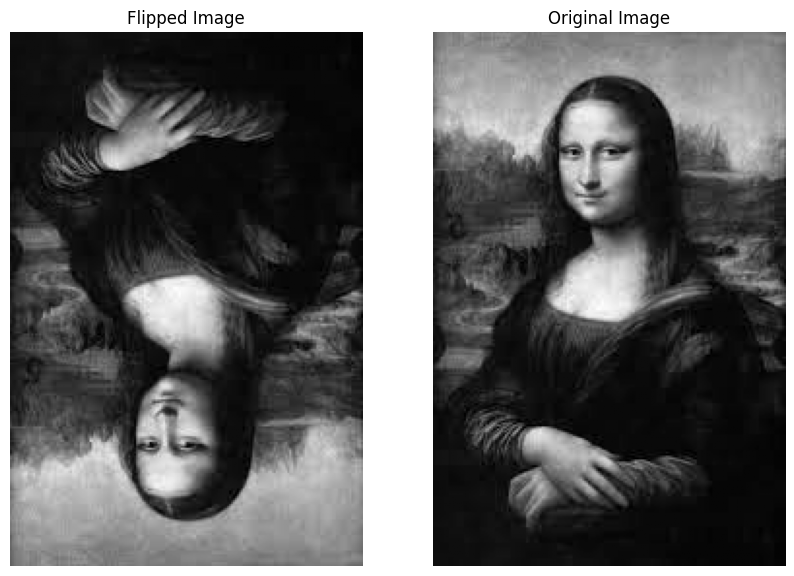

In [ ]:
plot_image(up_down_flip, img_pil, "Flipped Image", "Original Image")

How do these flips affect the image visually?

np.fliplr: (face turns to the opposite side) <br>
np.flipud: (face turns upside down) <br>

How are they different from transpose?

img.T: (Image is flipped over its diagonal (not like flipping))


### Extract a 100×100 region from the center of the image using slicing.

In [ ]:
height, width = img_pil_np.shape
center_cropped = img_pil_np[height//2 - 50:height//2 + 50, width//2 - 50:width//2 + 50]

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

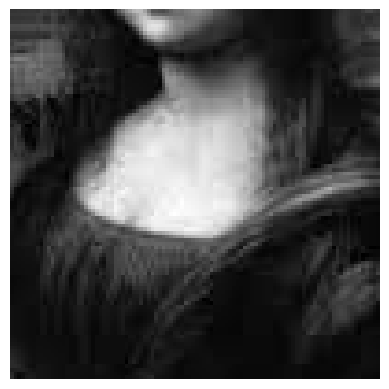

In [ ]:
plt.imshow(center_cropped, cmap='gray')
plt.axis('off')

### What part of the image are you extracting?

as provided up I'm extracting the center part of the image and im extracting a perfect square of 100 pixels height and 100 pixels width.

### Try slicing other regions — top-left, bottom-right:

top-left

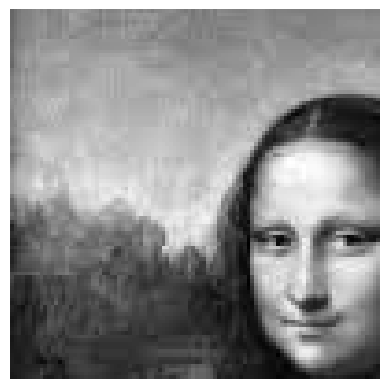

In [ ]:
top_left = img_pil_np[0:100, 0:100] # [0:100(row), 0:100(col)]
plt.imshow(top_left, cmap='gray')
plt.axis("off")
plt.show()

bottom-right

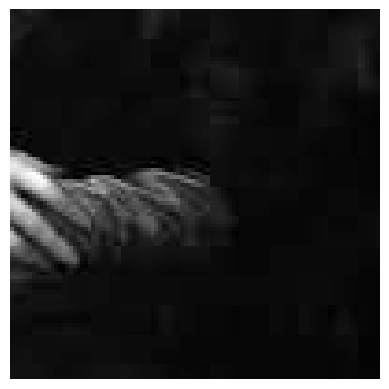

In [ ]:
bottom_right = img_pil_np[height-100:height, width-100:width]
plt.imshow(bottom_right, cmap='gray')
plt.axis("off")
plt.show()

### Use 255 - img to invert pixel values and create a negative effect.

In [ ]:
img_nav = 255 - img_pil_np

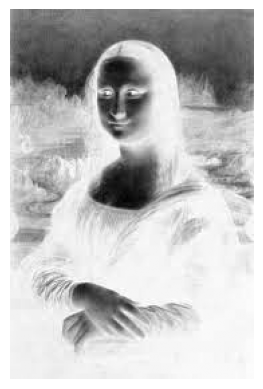

In [ ]:
plt.imshow(img_nav, cmap='gray')
plt.axis("off")
plt.show()

### What do brighter and darker areas become?

Bright pixels become dark <br>
Dark pixels become bright

### What kind of images could this be useful for?

X-ray, and Document scanner

### Rotate the image 90 degrees using np.rot90(img, k=...).

In [ ]:
rotate_1 = np.rot90(img_pil_np, k=1)

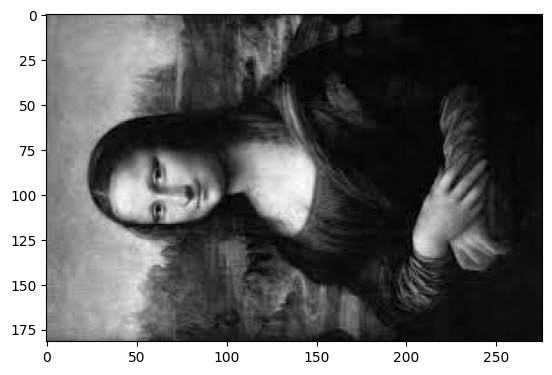

In [ ]:
plt.imshow(rotate_1, cmap='gray')

In [ ]:
rotate_mi1 = np.rot90(img_pil_np, k=-1)

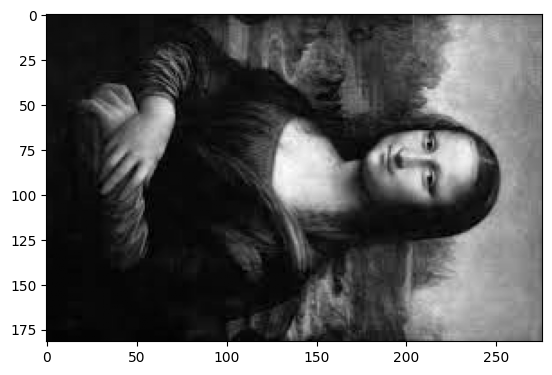

In [ ]:
plt.imshow(rotate_mi1, cmap='gray')

In [ ]:
rotate_2 = np.rot90(img_pil_np, k=2)

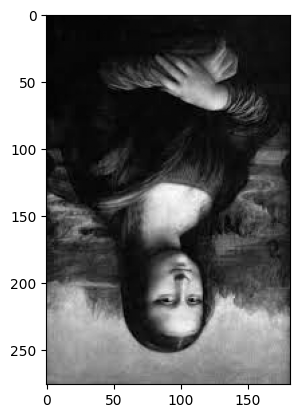

In [ ]:
plt.imshow(rotate_2, cmap='gray')

### How does this differ from transpose and flip?

np.rot90 rotates the whole image by 90°, while transpose swaps axes, and flip mirrors the image.

### Crop the center of the image. <br>
### Flip the cropped section horizontally. <br>
### Brighten the result. <br>
### Display the final transformation. <br>

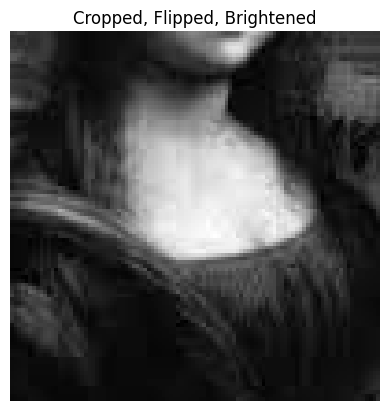

In [ ]:
# Crop:
height, width = img_pil_np.shape
center_cropped = img_pil_np[height//2 - 50:height//2 + 50, width//2 - 50:width//2 + 50]

# Flip Hz:
flipped = np.fliplr(center_cropped)

# Brighten:
brightened = np.clip(flipped + 30, 0, 255).astype(np.uint8)

# Display final result:
plt.imshow(brightened, cmap='gray')
plt.title("Cropped, Flipped, Brightened")
plt.axis("off")
plt.show()


### How does each transformation affect the image?

**Crop**: focuses on the center of the image. <br> 
**Flip**: flip the cropped image horizontally. <br>
**Brighten**: makes it lighter.

### Does the order of operations matter? Why?

Yes, the order matters because it affects which area is transformed and how it transformed.